# Calculate robusteness from pi control runs

In [23]:
# Some definitions

# directory of data
#fdir = '~/Google Drive/professional/research/FARALLON_INSTITUTE_PROJECTS/2020 NOAA MAPP/Climate_extremes_sharedfigsandcode/data/FOR SCATTER PLOT/'
fdir = '/Volumes/GoogleDrive/My Drive/Climate_extremes_sharedfigsandcode/data/Annual_TimeSeries/'

In [24]:
# Modules
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore') #filter some warning messages
import seaborn as sns

In [43]:
file = './counts.xlsx' # obs indices.xlsx'
df = pd.read_excel(file)
#df = df.rename(columns={'cclme_SSTA_hydro_ann':'CC_SST','nino_hydro_ann':'NINO','pdsi_anom_ann_hydro':'CA_PDSI','ca_pr_anom_hydro_ann':'CA_PRCP', 'goa_SSTA_hydro_ann':'GOA_SST', 'GOA_SSTA_6mo':'GOA_SST_6mo' ,'goa_SSTA_hydro_ann_12mo': 'GOA_SST_LEAD'  })
df.iloc[:,0:5]

,order,var,Number of co-occurrence per century,err,sce
0,a,Drought+GOA MHW,1.11,NaN,P.I.
1,b,Drought+GOA MHW,0.91,0.30,Present
2,c,Drought+GOA MHW,1.67,0.30,Future
3,p,NaN,0.00,0.00,NaN
4,g,GOA lead CC MHW,1.06,NaN,P.I.
5,h,GOA lead CC MHW,1.97,0.42,Present
6,i,GOA lead CC MHW,1.97,0.42,Future
7,q,NaN,0.00,0.00,NaN
8,j,Drought (2 years),2.30,NaN,P.I.
9,k,Drought (2 years),3.03,0.30,Present


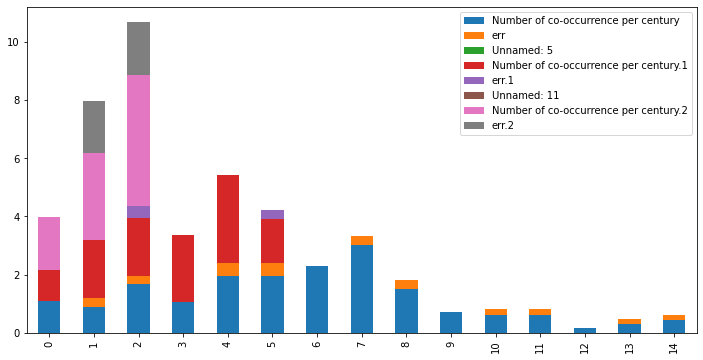

In [4]:
df.plot.bar(stacked=True, figsize=(12,6))

Text(0.5, 0, 'Number of co-occurrence per century')

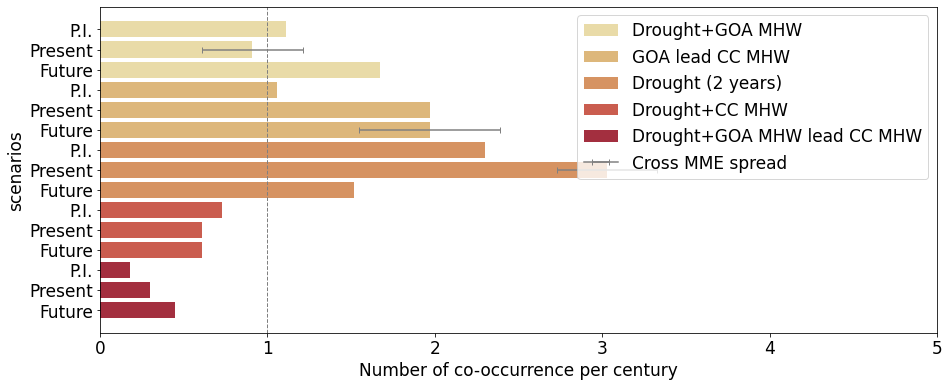

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15,6))

# Plot the crashes where alcohol was involved
sns.set_color_codes("pastel")
palette=plt.get_cmap('YlOrRd').reversed()
#'YlOrRd''rocket_r''ch:25''colorblind'
sns.barplot(x="Number of co-occurrence per century", y="order", hue='var', palette='YlOrRd', data=df.iloc[:,0:5],
              dodge=False, saturation=.6)

for i in range(4):
    plt.errorbar(df["Number of co-occurrence per century"].iloc[i*2+1], y=i*2+1, xerr=df["err"].iloc[i*2+1], color='gray',capsize=3)
i=4
plt.errorbar(df["Number of co-occurrence per century"].iloc[i*2+1], y=i*2+1, xerr=df["err"].iloc[i*2+1], color='gray',capsize=3,label="Cross MME spread")   

plt.axvline(x=1,color="gray",linestyle='--',linewidth=1)#,zorder=0) 

ax.legend(fontsize=17)
ax.set_yticklabels(df.sce ,fontsize=17)
ax.set_ylabel('scenarios',fontsize=17)
ax.set_xlim(0,5)
ax.set_xticklabels(["0","1","2","3","4","5"],fontsize=17)
ax.set_xlabel("Number of co-occurrence per century",fontsize=17)
#sns.despine(left=True, bottom=True)

Text(0.5, 0, 'Number of co-occurrence per century')

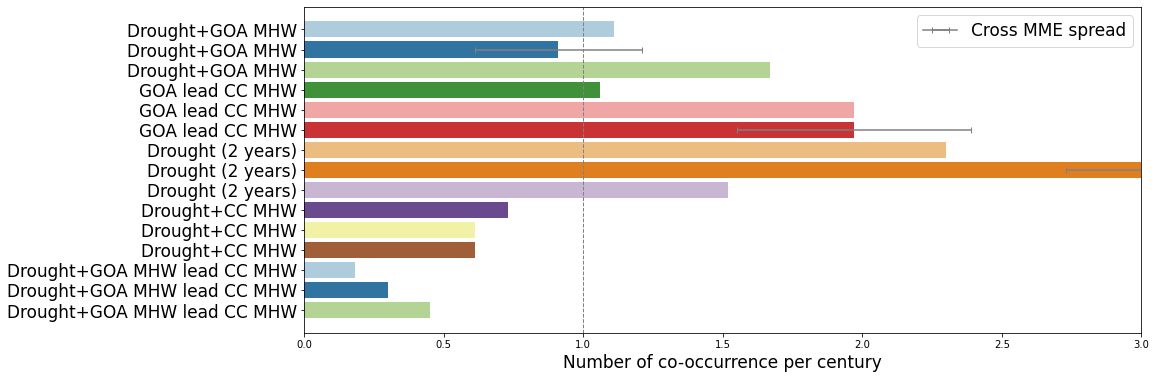

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15,6))

# Plot the crashes where alcohol was involved
sns.set_color_codes("pastel")
palette=plt.get_cmap('YlOrRd').reversed()
#'YlOrRd''rocket''ch:25''colorblind'
sns.barplot(x="Number of co-occurrence per century", y="order", palette='Paired', data=df.iloc[:,0:5],
              dodge=False)#, saturation=1)

for i in range(4):
    plt.errorbar(df["Number of co-occurrence per century"].iloc[i*2+1], y=i*2+1, xerr=df["err"].iloc[i*2+1], color='gray',capsize=3)
i=4
plt.errorbar(df["Number of co-occurrence per century"].iloc[i*2+1], y=i*2+1, xerr=df["err"].iloc[i*2+1], color='gray',capsize=3,label="Cross MME spread")   

plt.axvline(x=1,color="gray",linestyle='--',linewidth=1)#,zorder=0) 

ax.legend(fontsize=17)
ax.set_yticklabels(df["var"] ,fontsize=17)
ax.set_ylabel('',fontsize=17)
ax.set_xlim(0,3)
#ax.set_xticklabels(["0","1","2","3","4"],fontsize=17)
ax.set_xlabel("Number of co-occurrence per century",fontsize=17)
#sns.despine(left=True, bottom=True)

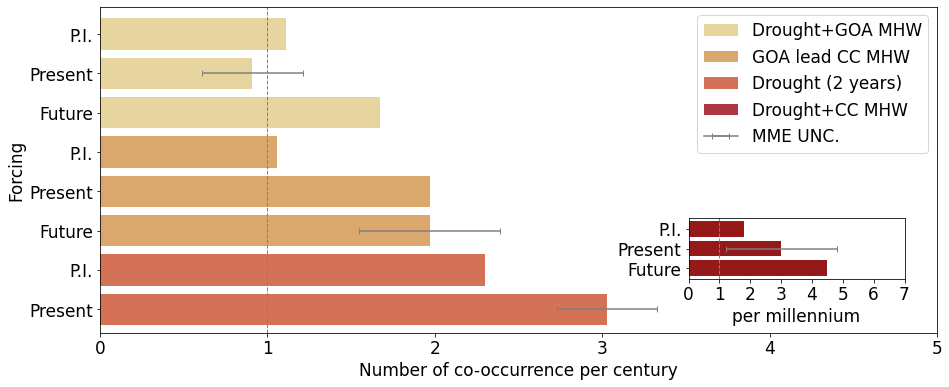

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="whitegrid")
kk=5
# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(15,6))

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.67, 0.25, 0.2, 0.14]
ax2 = f.add_axes([left, bottom, width, height])

# Plot the crashes where alcohol was involved
sns.set_color_codes("pastel")
palette=plt.get_cmap('YlOrRd').reversed()

bar=sns.barplot(x="Number of co-occurrence per century", y="order", hue='var', palette='YlOrRd', data=df.iloc[0:kk*2,0:5],
              dodge=False, saturation=.6,ax=ax1)

for i in range(kk):
    ax1.errorbar(df["Number of co-occurrence per century"].iloc[i*2+1], y=i*2+1, xerr=df["err"].iloc[i*2+1], color='gray',capsize=3)
i=kk-1
ax1.errorbar(df["Number of co-occurrence per century"].iloc[i*2+1], y=i*2+1, xerr=df["err"].iloc[i*2+1], color='gray',capsize=3,label="MME UNC.")   


ax1.axvline(x=1,color="gray",linestyle='--',linewidth=1)#,zorder=0) 

ax1.legend(loc='upper right',fontsize=17)
ax1.set_yticklabels(df.sce ,fontsize=17)
ax1.set_ylabel('Forcing',fontsize=17)
ax1.set_xlim(0,5)
ax1.set_ylim(7.6,-0.7)
ax1.set_xticklabels(["0","1","2","3","4","5"],fontsize=17) #["0","1","2","3","4"],
ax1.set_xlabel("Number of co-occurrence per century",fontsize=17)
#sns.despine(left=True, bottom=True)


bar2=sns.barplot(x="Number of co-occurrence per century.2", y="order.2",  color='darkred', data=df.iloc[:,11:15],
              dodge=False,saturation=1,alpha=.9, ax=ax2) #alpha=.3

for i in range(3):
    ax2.errorbar(df["Number of co-occurrence per century.2"].iloc[i*2+1], y=i*2+1, xerr=df["err.2"].iloc[i*2+1], color='gray',capsize=3)

ax2.axvline(x=1,color="gray",linestyle='--',linewidth=1)#,zorder=0) 

#ax2.legend('',fontsize=17)
ax2.set_yticklabels(df.sce ,fontsize=17)
ax2.set_ylabel('',fontsize=17)
ax2.set_xlim(0,7)
ax2.set_xticklabels(["0","1","2","3","4","5","6","7"],fontsize=17)
ax2.set_xlabel("per millennium",fontsize=17)

## Define some hatches
hatches =['.', '', 'x', '\\', '', 'o','-', '+', 'x', '\\', '.', '', 'x', '\\', '', 'o','-', '+', 'x', '\\', '.','', 'x', '\\', '', 'o','-', '+', 'x', '\\', '.','', 'x', '\\', '', 'o','-', '+', 'x', '\\', '/']
#for i, patch in enumerate(bar2.patches):
    #patch.set_hatch(hatches[i])

#for i, patch in enumerate(bar.patches):
    #patch.set_hatch(hatches[i])
    
#ax3 = ax1.twiny()
#sns.barplot(x="Number of co-occurrence per century", y="order", hue='var', hatch=hatches[0], data=df.iloc[0:8,0:5],
#              dodge=False,alpha=0,ax=ax3)

#ax3.legend('')
#ax3.set_xlim(0,4)



Text(0.5, 0, 'per millennium')

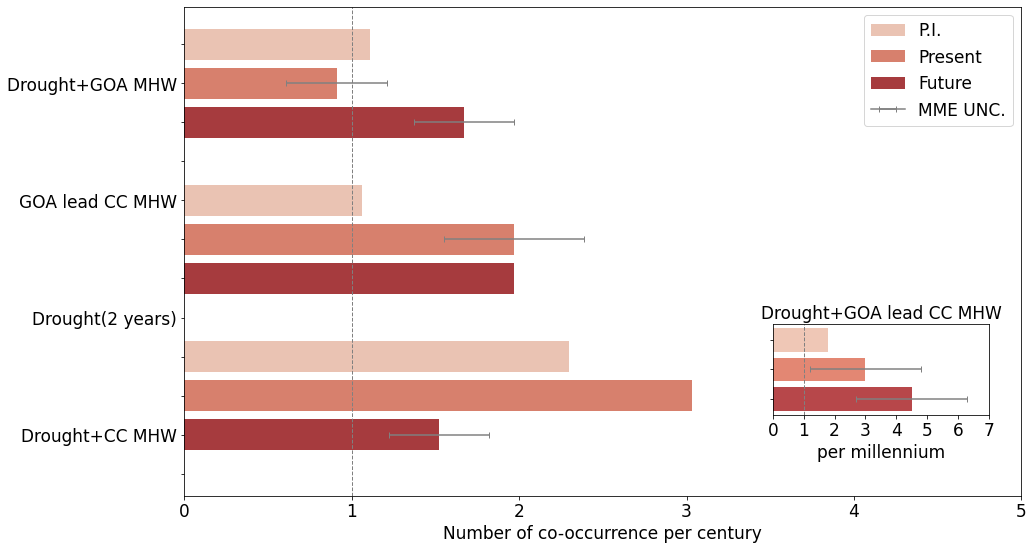

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="whitegrid")
kk=6
# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(15,kk*1.5))


# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.67, 0.25, 0.2, 0.14]
ax2 = f.add_axes([left, bottom, width, height])

#'Blues'
sns.barplot(x="Number of co-occurrence per century", y="order", hue='sce', palette='Reds', data=df.iloc[0:kk*2,0:5],
              dodge=False, saturation=.6,ax=ax1)
#sns.barplot(x="Number of co-occurrence per century", y="order", hue='sce', palette='Blues', data=df.iloc[0+6:kk*2,0:5],
#              dodge=False, saturation=.6,ax=ax1)

for i in range(kk-3):
    ax1.errorbar(df["Number of co-occurrence per century"].iloc[i*3+2], y=i*3+2, xerr=df["err"].iloc[i*3+2], color='gray',capsize=3)
    ax1.errorbar(df["Number of co-occurrence per century"].iloc[i*3+1], y=i*3+1, xerr=df["err"].iloc[i*3+1], color='gray',capsize=3)

i=kk-3
ax1.errorbar(df["Number of co-occurrence per century"].iloc[i*3+2], y=i*3+2, xerr=df["err"].iloc[i*3+2], color='gray',capsize=3)   
ax1.errorbar(df["Number of co-occurrence per century"].iloc[i*3+1], y=i*3+1, xerr=df["err"].iloc[i*3+1], color='gray',capsize=3,label="MME UNC.")   


ax1.axvline(x=1,color="gray",linestyle='--',linewidth=1)#,zorder=0) 

ax1.legend(loc='outside',fontsize=17)
#ax.set_yticklabels(df["var"] ,fontsize=17)
ax1.set_yticklabels(["","Drought+GOA MHW","","","GOA lead CC MHW","","","Drought(2 years)","","","Drought+CC MHW","","","Drought+GOA lead CC MHW"] ,fontsize=17)
ax1.set_ylabel('',fontsize=17)

ax1.set_xlim(0,5)
ax1.set_xticklabels(["0","1","2","3","4","5"],fontsize=17)
ax1.set_xlabel("Number of co-occurrence per century",fontsize=17)
#sns.despine(left=True, bottom=True)


sns.barplot(x="Number of co-occurrence per century.2", y="order.2",  palette='Reds', data=df.iloc[:,11:15],
              dodge=False,saturation=.7,alpha=.9, ax=ax2) #alpha=.3

for i in range(3):
    ax2.errorbar(df["Number of co-occurrence per century.2"].iloc[i*3+2], y=i*3+2, xerr=df["err.2"].iloc[i*3+2], color='gray',capsize=3)
    ax2.errorbar(df["Number of co-occurrence per century.2"].iloc[i*3+1], y=i*3+1, xerr=df["err.2"].iloc[i*3+1], color='gray',capsize=3)


ax2.axvline(x=1,color="gray",linestyle='--',linewidth=1)#,zorder=0) 

#ax2.legend('',fontsize=17)
#ax2.set_yticklabels(["Drought+GOA lead CC MHW",""] ,fontsize=17)
ax2.set_yticklabels(["","",""] ,fontsize=17)
ax2.set_title("Drought+GOA lead CC MHW" ,fontsize=17)

ax2.set_ylabel("",fontsize=17)
ax2.set_xlim(0,7)
ax2.set_xticklabels(["0","1","2","3","4","5","6","7"],fontsize=17)
ax2.set_xlabel("per millennium",fontsize=17)


Text(0.5, 0, 'per millennium')

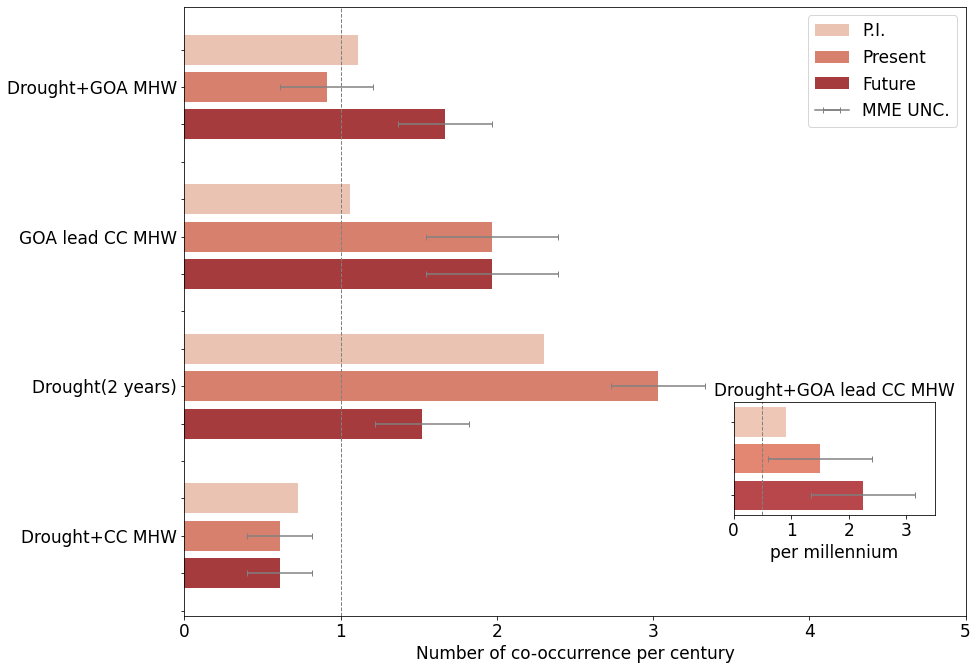

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="whitegrid")
kk=8
# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(15/3*4*0.7,kk*1.5/3*4*0.7))


# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.67, 0.25, 0.2, 0.14]
ax2 = f.add_axes([left, bottom, width, height])

#'Blues'
sns.barplot(x="Number of co-occurrence per century", y="order", hue='sce', palette='Reds', data=df.iloc[0:kk*2,0:5],
              dodge=False, saturation=.6,ax=ax1)
#sns.barplot(x="Number of co-occurrence per century", y="order", hue='sce', palette='Blues', data=df.iloc[0+6:kk*2,0:5],
#              dodge=False, saturation=.6,ax=ax1)

for i in range(kk-5):
    ax1.errorbar(df["Number of co-occurrence per century"].iloc[i*4+2], y=i*4+2, xerr=df["err"].iloc[i*4+2], color='gray',capsize=3)
    ax1.errorbar(df["Number of co-occurrence per century"].iloc[i*4+1], y=i*4+1, xerr=df["err"].iloc[i*4+1], color='gray',capsize=3)

i=kk-5
ax1.errorbar(df["Number of co-occurrence per century"].iloc[i*4+2], y=i*4+2, xerr=df["err"].iloc[i*4+2], color='gray',capsize=3)   
ax1.errorbar(df["Number of co-occurrence per century"].iloc[i*4+1], y=i*4+1, xerr=df["err"].iloc[i*4+1], color='gray',capsize=3,label="MME UNC.")   


ax1.axvline(x=1,color="gray",linestyle='--',linewidth=1)#,zorder=0) 

ax1.legend(loc='outside',fontsize=17)
#ax.set_yticklabels(df["var"] ,fontsize=17)
ax1.set_yticklabels(["","Drought+GOA MHW","","","","GOA lead CC MHW","","","","Drought(2 years)","","","","Drought+CC MHW","","","Drought+GOA lead CC MHW","",] ,fontsize=17)
ax1.set_ylabel('',fontsize=17)

ax1.set_xlim(0,5)
ax1.set_xticklabels(["0","1","2","3","4","5"],fontsize=17)
ax1.set_xlabel("Number of co-occurrence per century",fontsize=17)
#sns.despine(left=True, bottom=True)


sns.barplot(x="Number of co-occurrence per century.2", y="order.2",  palette='Reds', data=df.iloc[:,11:15],
              dodge=False,saturation=.7,alpha=.9, ax=ax2) #alpha=.3

for i in range(3):
    ax2.errorbar(df["Number of co-occurrence per century.2"].iloc[i*3+2], y=i*3+2, xerr=df["err.2"].iloc[i*3+2], color='gray',capsize=3)
    ax2.errorbar(df["Number of co-occurrence per century.2"].iloc[i*3+1], y=i*3+1, xerr=df["err.2"].iloc[i*3+1], color='gray',capsize=3)


ax2.axvline(x=1,color="gray",linestyle='--',linewidth=1)#,zorder=0) 

#ax2.legend('',fontsize=17)
#ax2.set_yticklabels(["Drought+GOA lead CC MHW",""] ,fontsize=17)
ax2.set_yticklabels(["","",""] ,fontsize=17)
ax2.set_title("Drought+GOA lead CC MHW" ,fontsize=17)

ax2.set_ylabel("",fontsize=17)
ax2.set_xlim(0,7)
ax2.set_xticklabels(["0","1","2","3","4","5","6","7"],fontsize=17)
ax2.set_xlabel("per millennium",fontsize=17)



Text(0.5, 0, 'per millennium')

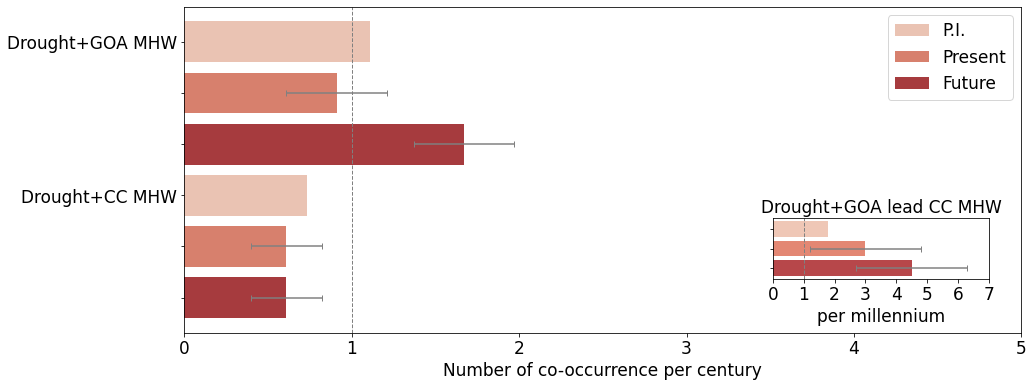

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="whitegrid")
kk=2
# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(15,kk*3))


# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.67, 0.25, 0.2, 0.14]
ax2 = f.add_axes([left, bottom, width, height])

#'Blues'
sns.barplot(x="Number of co-occurrence per century", y="order", hue='sce', palette='Reds', data=df.iloc[0:kk*3,0:5],
              dodge=False, saturation=.6,ax=ax1)

for i in range(kk):
    ax1.errorbar(df["Number of co-occurrence per century"].iloc[i*3+2], y=i*3+2, xerr=df["err"].iloc[i*3+2], color='gray',capsize=3)
    ax1.errorbar(df["Number of co-occurrence per century"].iloc[i*3+1], y=i*3+1, xerr=df["err"].iloc[i*3+1], color='gray',capsize=3)

#i=kk
#ax1.errorbar(df["Number of co-occurrence per century"].iloc[i*3+2], y=i*3+2, xerr=df["err"].iloc[i*3+2], color='gray',capsize=3)   
#ax1.errorbar(df["Number of co-occurrence per century"].iloc[i*3+1], y=i*3+1, xerr=df["err"].iloc[i*3+1], color='gray',capsize=3,label="Cross MME spread")   


ax1.axvline(x=1,color="gray",linestyle='--',linewidth=1)#,zorder=0) 

ax1.legend(loc='outside',fontsize=17)
#ax.set_yticklabels(df["var"] ,fontsize=17)
ax1.set_yticklabels(["Drought+GOA MHW","","","Drought+CC MHW","","","GOA lead CC MHW","","","Drought(2 years)","","","Drought+GOA lead CC MHW"] ,fontsize=17)
ax1.set_ylabel('',fontsize=17)

ax1.set_xlim(0,5)
ax1.set_xticklabels(["0","1","2","3","4","5"],fontsize=17)
ax1.set_xlabel("Number of co-occurrence per century",fontsize=17)
#sns.despine(left=True, bottom=True)


sns.barplot(x="Number of co-occurrence per century.2", y="order.2",  palette='Reds', data=df.iloc[:,11:15],
              dodge=False,saturation=.7,alpha=.9, ax=ax2) #alpha=.3

for i in range(3):
    ax2.errorbar(df["Number of co-occurrence per century.2"].iloc[i*3+2], y=i*3+2, xerr=df["err.2"].iloc[i*3+2], color='gray',capsize=3)
    ax2.errorbar(df["Number of co-occurrence per century.2"].iloc[i*3+1], y=i*3+1, xerr=df["err.2"].iloc[i*3+1], color='gray',capsize=3)


ax2.axvline(x=1,color="gray",linestyle='--',linewidth=1)#,zorder=0) 

#ax2.legend('',fontsize=17)
#ax2.set_yticklabels(["Drought+GOA lead CC MHW",""] ,fontsize=17)
ax2.set_yticklabels(["","",""] ,fontsize=17)
ax2.set_title("Drought+GOA lead CC MHW" ,fontsize=17)

ax2.set_ylabel("",fontsize=17)
ax2.set_xlim(0,7)
ax2.set_xticklabels(["0","1","2","3","4","5","6","7"],fontsize=17)
ax2.set_xlabel("per millennium",fontsize=17)



Text(0.5, 0, 'per millennium')

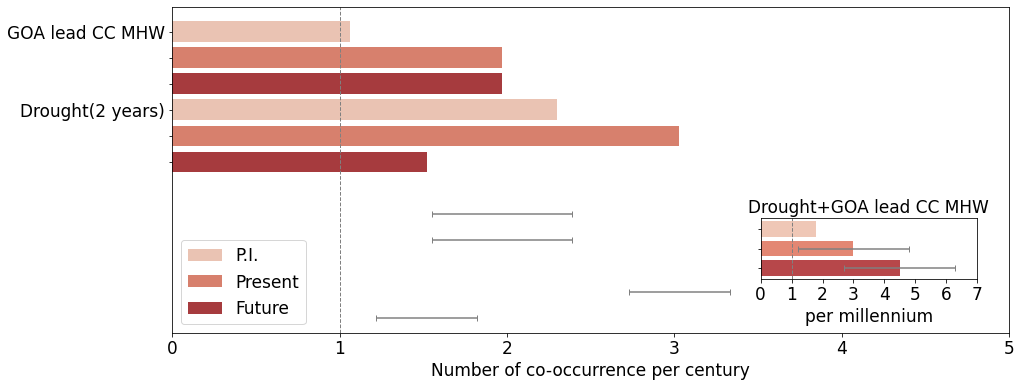

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="whitegrid")
kk=2
# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(15,kk*3))


# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.67, 0.25, 0.2, 0.14]
ax2 = f.add_axes([left, bottom, width, height])

#'Blues'
sns.barplot(x="Number of co-occurrence per century", y="order", hue='sce', palette='Reds', data=df.iloc[6:6+kk*3,0:5],
              dodge=False, saturation=.6,ax=ax1)

for i in range(kk):
    ax1.errorbar(df["Number of co-occurrence per century"].iloc[6+i*3+2], y=6+i*3+2, xerr=df["err"].iloc[6+i*3+2], color='gray',capsize=3)
    ax1.errorbar(df["Number of co-occurrence per century"].iloc[6+i*3+1], y=6+i*3+1, xerr=df["err"].iloc[6+i*3+1], color='gray',capsize=3)

#i=kk
#ax1.errorbar(df["Number of co-occurrence per century"].iloc[i*3+2], y=i*3+2, xerr=df["err"].iloc[i*3+2], color='gray',capsize=3)   
#ax1.errorbar(df["Number of co-occurrence per century"].iloc[i*3+1], y=i*3+1, xerr=df["err"].iloc[i*3+1], color='gray',capsize=3,label="Cross MME spread")   


ax1.axvline(x=1,color="gray",linestyle='--',linewidth=1)#,zorder=0) 

ax1.legend(loc='outside',fontsize=17)
#ax.set_yticklabels(df["var"] ,fontsize=17)
ax1.set_yticklabels(["GOA lead CC MHW","","","Drought(2 years)","","","Drought+GOA lead CC MHW"] ,fontsize=17)
ax1.set_ylabel('',fontsize=17)

ax1.set_xlim(0,5)
ax1.set_xticklabels(["0","1","2","3","4","5"],fontsize=17)
ax1.set_xlabel("Number of co-occurrence per century",fontsize=17)
#sns.despine(left=True, bottom=True)


sns.barplot(x="Number of co-occurrence per century.2", y="order.2",  palette='Reds', data=df.iloc[:,11:15],
              dodge=False,saturation=.7,alpha=.9, ax=ax2) #alpha=.3

for i in range(3):
    ax2.errorbar(df["Number of co-occurrence per century.2"].iloc[i*3+2], y=i*3+2, xerr=df["err.2"].iloc[i*3+2], color='gray',capsize=3)
    ax2.errorbar(df["Number of co-occurrence per century.2"].iloc[i*3+1], y=i*3+1, xerr=df["err.2"].iloc[i*3+1], color='gray',capsize=3)


ax2.axvline(x=1,color="gray",linestyle='--',linewidth=1)#,zorder=0) 

#ax2.legend('',fontsize=17)
#ax2.set_yticklabels(["Drought+GOA lead CC MHW",""] ,fontsize=17)
ax2.set_yticklabels(["","",""] ,fontsize=17)
ax2.set_title("Drought+GOA lead CC MHW" ,fontsize=17)

ax2.set_ylabel("",fontsize=17)
ax2.set_xlim(0,7)
ax2.set_xticklabels(["0","1","2","3","4","5","6","7"],fontsize=17)
ax2.set_xlabel("per millennium",fontsize=17)




Text(0.5, 0, 'Number of co-occurrence per millennium')

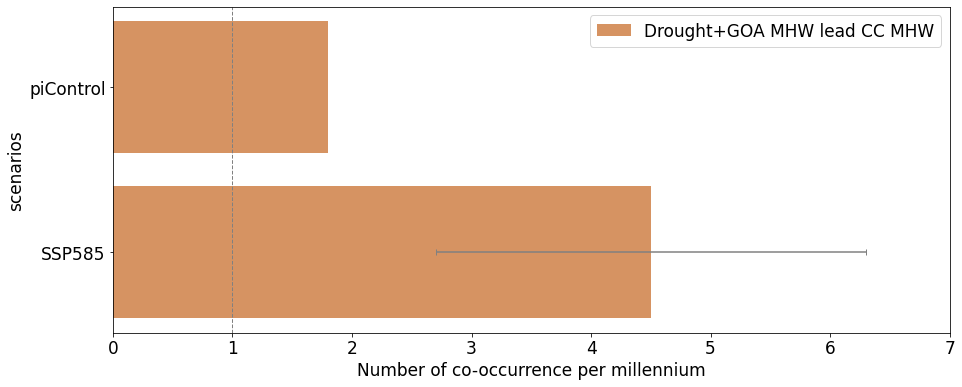

In [568]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15,6))

# Plot the crashes where alcohol was involved
sns.set_color_codes("pastel")
palette=plt.get_cmap('YlOrRd').reversed()

sns.barplot(x="Number of co-occurrence per century.2", y="order.2", hue='var.2', palette='YlOrRd', data=df.iloc[:,11:15],
              dodge=False, saturation=.6)

for i in range(3):
    plt.errorbar(df["Number of co-occurrence per century.2"].iloc[i*2+1], y=i*2+1, xerr=df["err.2"].iloc[i*2+1], color='gray',capsize=3)

plt.axvline(x=1,color="gray",linestyle='--',linewidth=1)#,zorder=0) 

ax.legend(loc='outside',fontsize=17)
ax.set_yticklabels(df.sce ,fontsize=17)
ax.set_ylabel('scenarios',fontsize=17)
ax.set_xlim(0,7)
ax.set_xticklabels(["0","1","2","3","4","5","6","7"],fontsize=17)
ax.set_xlabel("Number of co-occurrence per millennium",fontsize=17)
#sns.despine(left=True, bottom=True)

In [121]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
